# Credit Card Default Analysis

#### Default Payments of Credit Card Clients in Taiwan from 2005

## 1. Import Data
Data source from Kaggle: https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset <br>
Original data source: http://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients


In [1]:
# Import packages and modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read file into dataframe and print out dataframe shape
raw_data = pd.read_csv("UCI_Credit_Card.csv")
raw_data.shape

(30000, 25)

## 2. Understand the Data

In [3]:
# Examine the first 10 rows of the data
raw_data.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
5,6,50000.0,1,1,2,37,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
6,7,500000.0,1,1,2,29,0,0,0,0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
7,8,100000.0,2,2,2,23,0,-1,-1,0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
8,9,140000.0,2,3,1,28,0,0,2,0,...,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0
9,10,20000.0,1,3,2,35,-2,-2,-2,-2,...,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0


### Description of columns from dataset documentation
There are 25 variables: <br>
•   ID: ID of each client    <br>
•   LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit  <br>
•	SEX: Gender (1=male, 2=female)  <br>
•	EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown) <br>
•	MARRIAGE: Marital status (1=married, 2=single, 3=others) <br>
•	AGE: Age in years  <br>
•	PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)  <br>
•	PAY_2: Repayment status in August, 2005 (scale same as above)  <br>
•	PAY_3: Repayment status in July, 2005 (scale same as above)  <br>
•	PAY_4: Repayment status in June, 2005 (scale same as above)  <br>
•	PAY_5: Repayment status in May, 2005 (scale same as above)  <br>
•	PAY_6: Repayment status in April, 2005 (scale same as above) <br>
•	BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar) <br>
•	BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar) <br>
•	BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar) <br>
•	BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar) <br>
•	BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar) <br>
•	BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar) <br>
•	PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar) <br>
•	PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar) <br>
•	PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar) <br>
•	PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar) <br>
•	PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar) <br>
•	PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar) <br>
•	default.payment.next.month: Default payment (1=yes, 0=no) <br>

In [4]:
# Understand the data by printing out all column names

raw_data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [5]:
# Change the last inconsistent column name 'default.payment.next.month'to make it consistent

raw_data.rename(columns={'default.payment.next.month':'DEF_PAY_NMO'},inplace = True)
raw_data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'DEF_PAY_NMO'],
      dtype='object')

In [6]:
# Understand the data by checking the first row

raw_data.loc[0]

ID                 1.0
LIMIT_BAL      20000.0
SEX                2.0
EDUCATION          2.0
MARRIAGE           1.0
AGE               24.0
PAY_0              2.0
PAY_2              2.0
PAY_3             -1.0
PAY_4             -1.0
PAY_5             -2.0
PAY_6             -2.0
BILL_AMT1       3913.0
BILL_AMT2       3102.0
BILL_AMT3        689.0
BILL_AMT4          0.0
BILL_AMT5          0.0
BILL_AMT6          0.0
PAY_AMT1           0.0
PAY_AMT2         689.0
PAY_AMT3           0.0
PAY_AMT4           0.0
PAY_AMT5           0.0
PAY_AMT6           0.0
DEF_PAY_NMO        1.0
Name: 0, dtype: float64

### Question: what do 0 and -2 mean in Pay_X columns?

From above documentation: 
PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above). Then What does 0 and -2 mean? These are not included in the data description. Also by doing the value_counts, it shows PAY_0 = 0 is the most frequent observations. 

After searching online, I realized the same question was asked by others, and the answer from the dataset contributor was:

#### -2: No consumption; <br>-1: Paid in full; <br>0: The use of revolving credit, meaning the payment wasn't due, which makes sense that most customers were using the revolving credit.

https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset/discussion/34608

In [7]:
# Check the all the repayment status codes in PAY_0
# There are 2 codes that are undocumented: 0,-2

raw_data['PAY_0'].value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64

In [8]:
# Check if there are any other undocumented values from PAY_2 to PAY_6
# All columns have value range from -2 to 8

pay = raw_data[['PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']]
pay_melt = pd.melt(pay)
print(pay_melt['value'].value_counts())

 0    81182
-1    28954
-2    21656
 2    16297
 3     1108
 4      377
 7      209
 5      111
 6       63
 1       34
 8        9
Name: value, dtype: int64


### Question: what does 'default.payment.next.month' mean?
Is it a predictor or actual data that collected in the next month - Oct. 2005? According to the reply from the dataset contributor,it seems this is the actual data collected in the next month. "Y: client's behavior; Y=0 then not default, Y=1 then default". This information can be used to test the accurary of the model that will be built.

## 3. Data Cleanning

### Check missing values, column type and column names
There is no missing value, all columns have the correct type, and all columns are named consistently since we have renamed the last inconsistent column name to 'DEF_PAY_NMO.

In [9]:
# Check column names, columan data type and indentify any missing values
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID             30000 non-null int64
LIMIT_BAL      30000 non-null float64
SEX            30000 non-null int64
EDUCATION      30000 non-null int64
MARRIAGE       30000 non-null int64
AGE            30000 non-null int64
PAY_0          30000 non-null int64
PAY_2          30000 non-null int64
PAY_3          30000 non-null int64
PAY_4          30000 non-null int64
PAY_5          30000 non-null int64
PAY_6          30000 non-null int64
BILL_AMT1      30000 non-null float64
BILL_AMT2      30000 non-null float64
BILL_AMT3      30000 non-null float64
BILL_AMT4      30000 non-null float64
BILL_AMT5      30000 non-null float64
BILL_AMT6      30000 non-null float64
PAY_AMT1       30000 non-null float64
PAY_AMT2       30000 non-null float64
PAY_AMT3       30000 non-null float64
PAY_AMT4       30000 non-null float64
PAY_AMT5       30000 non-null float64
PAY_AMT6       30000 non-null float64
D

### Check duplicate records
There are no duplicate IDs or rows.

In [10]:
# Check if there is any duplicate IDs
condition = bool(raw_data.duplicated(subset = 'ID').any())

if condition:
    print('There are duplicate IDs')
else:
    print('No duplicate IDs')

No duplicate IDs


### Indentify outliners

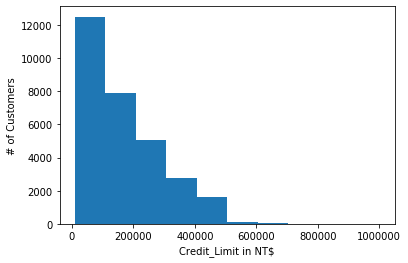

In [11]:
# Use histogram to view the distribution of credit limit

plt.hist(raw_data["LIMIT_BAL"])
plt.xlabel('Credit_Limit in NT$')
plt.ylabel('# of Customers')
plt.show()

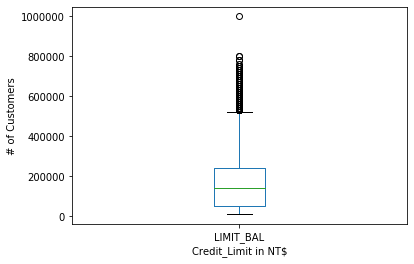

In [12]:
# Use boxplot to identify any outliner in credit limit

raw_data["LIMIT_BAL"].plot(kind="box")
plt.xlabel('Credit_Limit in NT$')
plt.ylabel('# of Customers')
plt.show()

In [13]:
# Take a close look at the outliner
# The observations from other columns indicate that this was just a customer who has excellent payment history
# Therefore it should be considered as a valid data

outliners = raw_data.loc[raw_data['LIMIT_BAL']>900000]
outliners

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEF_PAY_NMO
2197,2198,1000000.0,2,1,1,47,0,0,0,-1,...,891586.0,927171.0,961664.0,50784.0,50723.0,896040.0,50000.0,50000.0,50256.0,0



### Question: why are there negative bills?

Interesting enough, the minimals of those 6 bill columns are negative numbers. In general, there are 599-688 bills with negative amounts each month, which is less than 2% of total 30,000 records monthly. Also, the average negative amount in USD is $38 - $102 which are small amount. Therefore, an informed guess would be these are refund after purchasing. 

In [14]:
# Check the data in bill statement columns

bill = raw_data[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']]
bill.describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


In [15]:
# How many bills have negative amount?
# There are 3932 bills with negative amounts, each month has 599-688 records 

bill_melt = pd.melt(bill, var_name = 'bill_cycle',value_name = 'amount')
neg_bill = bill_melt[bill_melt['amount']<0]
neg_bill.groupby('bill_cycle').count()


,amount
bill_cycle,
BILL_AMT1,590
BILL_AMT2,669
BILL_AMT3,655
BILL_AMT4,675
BILL_AMT5,655
BILL_AMT6,688


In [33]:
# What is the average amount of negative bill each month?
# Use USD/NTD = 30 to get the amount in USD. The average negative amount is $38-$102.

neg_bill_mean_ndt = neg_bill.groupby('bill_cycle')['amount'].mean()
print('Average negative amounts in NTD are: \n')
print(neg_bill_mean_ndt)
print('\nAverage negative amounts in USD are: \n')
print(neg_bill_mean_ndt/30)


Average negative amounts in NTD are: 

bill_cycle
BILL_AMT1   -1154.796610
BILL_AMT2   -1230.621824
BILL_AMT3   -1466.291603
BILL_AMT4   -1631.242963
BILL_AMT5   -1634.708397
BILL_AMT6   -3074.492733
Name: amount, dtype: float64

Average negative amounts in USD are: 

bill_cycle
BILL_AMT1    -38.493220
BILL_AMT2    -41.020727
BILL_AMT3    -48.876387
BILL_AMT4    -54.374765
BILL_AMT5    -54.490280
BILL_AMT6   -102.483091
Name: amount, dtype: float64


### Question: why are some bill statement amounts greater than credit limit?

The common sense is bill statement amount shouldn't exceed credit limit, however, there are 3931 customers whose bill amounts are greater than credit limit. Could the difference be interest assuming these customers had delayed payment? We will explore this at data analysis phase.

In [17]:
# Is there any bill amount that is greater than credit limit?

condition1 = raw_data['BILL_AMT1'] > raw_data['LIMIT_BAL'] 
condition2 = raw_data['BILL_AMT2'] > raw_data['LIMIT_BAL'] 
condition3 = raw_data['BILL_AMT3'] > raw_data['LIMIT_BAL'] 
condition4 = raw_data['BILL_AMT4'] > raw_data['LIMIT_BAL'] 
condition5 = raw_data['BILL_AMT5'] > raw_data['LIMIT_BAL'] 
condition6 = raw_data['BILL_AMT6'] > raw_data['LIMIT_BAL'] 

large_bill = raw_data[condition1 | condition2 |condition3 | condition4 | condition5 | condition6]
large_bill

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEF_PAY_NMO
5,6,50000.0,1,1,2,37,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
6,7,500000.0,1,1,2,29,0,0,0,0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
15,16,50000.0,2,3,3,23,1,2,0,0,...,28771.0,29531.0,30211.0,0.0,1500.0,1100.0,1200.0,1300.0,1100.0,0
40,41,360000.0,1,1,2,33,0,0,0,0,...,628699.0,195969.0,179224.0,10000.0,7000.0,6000.0,188840.0,28000.0,4000.0,0
49,50,20000.0,1,1,2,24,0,0,0,0,...,19865.0,20480.0,20063.0,1318.0,1315.0,704.0,928.0,912.0,1069.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29980,29981,50000.0,1,3,2,42,0,0,0,0,...,50360.0,19971.0,19694.0,10000.0,4000.0,5000.0,3000.0,4500.0,2000.0,0
29988,29989,250000.0,1,1,1,34,0,0,0,0,...,245750.0,175005.0,179687.0,65000.0,8800.0,9011.0,6000.0,7000.0,6009.0,0
29992,29993,10000.0,1,3,1,43,0,0,0,-2,...,0.0,0.0,0.0,2000.0,0.0,0.0,0.0,0.0,0.0,0
29993,29994,100000.0,1,1,2,38,0,-1,-1,0,...,70626.0,69473.0,55004.0,2000.0,111784.0,4000.0,3000.0,2000.0,2000.0,0


### Question: why customers who had no consumption in 6 month then had default in the next month?

First explore if there is any customer who never had consumption and the data shows there are 317 customers who were inactive in 6 months. Then check against the 'default.payment.next.month' column to see if these customers all had no default. The common sense should be no default payment next month if the previous bill was o. However, we see there are 317 "1"s which means default in the next month. We will investigate this in data analysis process.

In [18]:
# Is there any customer who never had any transaction, meaning bill amount in 6 months remained as 0
# There are 870 customers whose bill amount was 0 in 6 months

bill_amt = raw_data[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']]
no_transaction = bill_amt[bill_amt.sum(axis=1) ==0]
no_transaction

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
18,0.0,0.0,0.0,0.0,0.0,0.0
19,0.0,0.0,0.0,0.0,0.0,0.0
45,0.0,0.0,0.0,0.0,0.0,0.0
79,0.0,0.0,0.0,0.0,0.0,0.0
121,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
29908,0.0,0.0,0.0,0.0,0.0,0.0
29909,0.0,0.0,0.0,0.0,0.0,0.0
29973,0.0,0.0,0.0,0.0,0.0,0.0
29979,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
# Check if those 870 customers defaulted in the next month (Oct.2005)
# The assumption is since they did not have any consumption, they shouldn't default, so there shouldn't be any '1'

no_transaction_de = raw_data.loc[no_transaction.index,['DEF_PAY_NMO']]
no_transaction_de

,DEF_PAY_NMO
18,0
19,0
45,1
79,1
121,1
...,...
29908,1
29909,0
29973,1
29979,0


In [20]:
# How many inactive customers had default payment next month
# 317 customers had default payment next month which is against common sense

no_transaction_de['DEF_PAY_NMO'].value_counts()

0    553
1    317
Name: DEF_PAY_NMO, dtype: int64

In [21]:
# Get the statistic summary of the payment amount columns
# No data is extremly unresonable in these columns

payment = raw_data[['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']]
payment.describe()


,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [22]:
# Get a sense of how many customers had default payment in the next month (Oct.2005)?

raw_data['DEF_PAY_NMO'].value_counts(normalize=True)

0    0.7788
1    0.2212
Name: DEF_PAY_NMO, dtype: float64

### Check Categorical Columns

Next, we will check these 3 columns: SEX',	'EDUCATION' and	'MARRIAGE'.	The 'SEX' column looks fine, while 'EDUCATION' and 'MARRIAGE' columns have some undocumented data and 'EDUCATION' column has duplicated values in different codes.

In [23]:
# Get SEX column's distribution. 1: male; 2: female

raw_data["SEX"].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

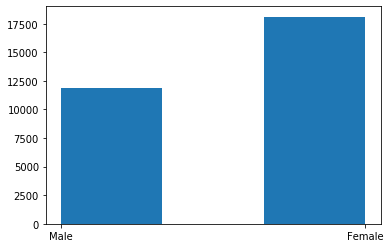

In [24]:
# Visuliza SEX distribution

plt.hist(raw_data["SEX"], bins=3)
plt.xticks([1.0,2.0],['Male','Female'])
plt.show()

### Question: why are there 2 'unknown's in education and 14 observations with code 0 ?
5 and 6 are both recorded as 'unknown' and there is 0 which isn't explained in the dataset description. Since the amounts are so small, therefore we can ignore.

In [25]:
# EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

raw_data["EDUCATION"].unique()

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

In [26]:
# Get the total counts of each EDUCATION level

raw_data["EDUCATION"].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

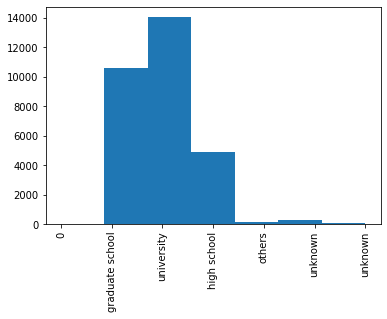

In [27]:
# Use histogram to visualize EDUCATION distribution

plt.hist(raw_data["EDUCATION"], bins=7)
plt.xticks(np.arange(7),("0","graduate school", "university", "high school", "others", "unknown", "unknown"),rotation = 90)
plt.show()

### Question: what does 0 mean in 'MARRIAGE'? 
Since there are only 0.18% (or 54) observations of 0, we can leave it as is.

In [28]:
# From dataset description: MARRIAGE: Marital status (1=married, 2=single, 3=others), but there is also 0

raw_data["MARRIAGE"].unique()

array([1, 2, 3, 0], dtype=int64)

In [29]:
# How many customers had "MARRIAGE" status as 0?

raw_data["MARRIAGE"].value_counts(normalize=True)

2    0.532133
1    0.455300
3    0.010767
0    0.001800
Name: MARRIAGE, dtype: float64

### Get AGE Distribution
Finally, let's check the distribution of age group. Looks like most of customers were 30-40 years old.

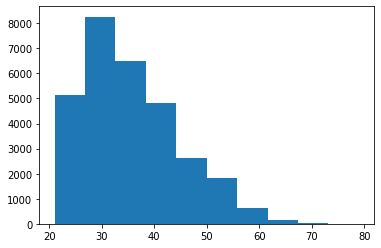

In [38]:
# Use histogram to visualize age distribution

plt.hist(raw_data["AGE"])
plt.show()

By now, we have checked each column of the dataset and understood the meaning of them, the dataset is ready for further analysis.